# Cosmo Crew Group Assignment

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Reading in data

In [20]:
harris_p1 = pd.read_csv('../Data/HarrisPartI.csv')      #  Reading in Harris part 1
harris_p3 = pd.read_csv('../Data/HarrisPartIII.csv')    #  Reading in Harris part 3
krause_21 = pd.read_csv('../Data/Krause21.csv')         #  Reading in Krause21
vandenBerg_t2 = pd.read_csv('../Data/VandenBerg_table2.csv')    #  Reading in VandenBerg table 2

In [21]:
harris_p1.head()    #  Displaying first 5 rows of Harris part 1

,ID,Name,RA,DEC,L,B,R_Sun,R_gc,X,Y,Z
0,NGC 104,47 Tuc,00:24:05.67,-72:04:52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,-3.1
1,NGC 288,NaN,00:52:45.24,-26:34:57.4,152.30,-89.38,8.9,12.0,-0.1,0.0,-8.9
2,NGC 362,NaN,01:03:14.26,-70:50:55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,-6.2
3,Whiting 1,NaN,02:02:57,-03:15:10,161.22,-60.76,30.1,34.5,-13.9,4.7,-26.3
4,NGC 1261,NaN,03:12:16.21,-55:12:58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,-12.9


In [22]:
harris_p3.head()   #  Displaying first 5 rows of Harris part 3

,ID,v_r,v_r_e,v_LSR,sig_v,sig_v_e,c,r_c,r_h,mu_V,rho_0,lg_tc,lg_th
0,NGC 104,-18.0,0.1,-26.7,11.0,0.3,2.07,0.36,3.17,14.38,4.88,7.84,9.55
1,NGC 288,-45.4,0.2,-51.9,2.9,0.3,0.99,1.35,2.23,20.05,1.78,8.99,9.32
2,NGC 362,223.5,0.5,214.0,6.4,0.3,1.76,0.18,0.82,14.80,4.74,7.76,8.93
3,Whiting 1,-130.6,1.8,-138.1,NaN,NaN,0.55,0.25,0.22,NaN,NaN,NaN,7.93
4,NGC 1261,68.2,4.6,54.9,NaN,NaN,1.16,0.35,0.68,17.73,2.99,8.59,9.12


In [23]:
krause_21.head()   #  Displaying first 5 rows of Krause21

,Class,Object,AltName,Mstar,rh,C5,Age,FeH
0,GC,NGC104,47Tuc,6.46,7.10,0.92,12.80,-0.76
1,GC,NGC288,Melotte3,0.46,9.80,0.05,12.20,-1.32
2,GC,NGC362,Dunlop62,2.50,3.50,0.72,10.00,-1.26
3,GC,NGC1261,Caldwell87,3.41,5.50,0.62,10.24,-1.08
4,GC,NGC1851,Dunlop508,5.51,3.05,1.81,7.64,-1.13


In [24]:
vandenBerg_t2.head()   #  Displaying first 5 rows of VandenBerg table 2

,#NGC,Name,FeH,Age,Age_err,Method,Figs,Range,HBtype,R_G,M_V,v_e0,log_sigma_0
0,104,47Tuc,-0.76,11.75,0.25,V,14,11.50–11.75,-0.99,7.4,-9.42,54.8,5.061
1,288,XXXX,-1.32,11.50,0.38,H,24,NaN,0.98,12.0,-6.75,10.9,2.953
2,362,XXXX,-1.30,10.75,0.25,V,13,10.75–11.00,-0.87,9.4,-8.43,44.4,4.938
3,1261,XXXX,-1.27,10.75,0.25,V,13,10.75–11.25,-0.71,18.1,-7.80,23.6,3.913
4,1851,XXXX,-1.18,11.00,0.25,V,13,10.75–11.25,-0.32,16.6,-8.33,47.6,5.136


## Merging Dataframes

In [83]:
# Combining Harris part 1 and part 3 dataframes
harris = pd.merge(harris_p1, harris_p3, on='ID')

# Renaming the corresponding columns in Krause 21 and vandenBerg to be 'ID`
krause_21.rename(columns={'Object': 'ID'}, inplace=True)
vandenBerg_t2.rename(columns={'#NGC': 'ID'}, inplace=True)

# Updating the ID values in Krause 21 and Harris to be the same format as vandenBerg
krause_21['ID'] = krause_21['ID'].str.replace('NGC', '')
harris['ID'] = harris['ID'].str.replace('NGC ', '')

# Merging the Krause 21 and Harris dataframes together
krause_harris = pd.merge(krause_21, harris, on='ID')

# Merging the vandenBerg and Harris dataframes together
vandenBerg_harris = pd.merge(vandenBerg_t2, harris, on='ID')

## Plotting the positions of GCs in the Harris catalogue

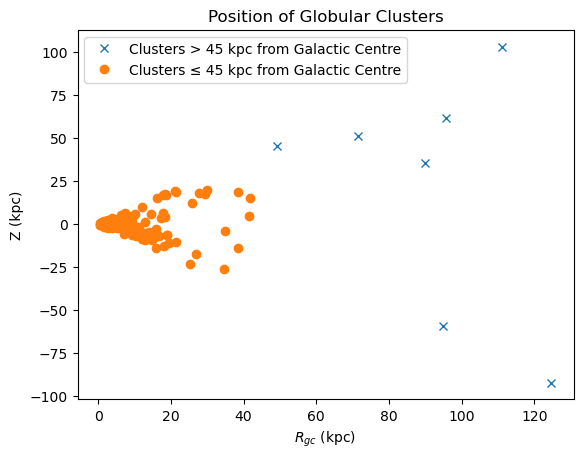

In [ ]:
# Setting a distance threshold (in kpc)
dis_threshold = 45

#Creating a mask to only show globular clusters further than the distance threshold from the Galactic Centre
mask = harris['ID'] > dis_threshold

plt.plot(# Plotting clusters that show up in the mask (greater than the distance threshold from Galactic Centre)
    harris['R_gc'][mask],
    harris['Z'][mask],
    'x', 
    label = 'Clusters > '+ str(dis_threshold) +' kpc from Galactic Centre'
)

plt.plot(# Plotting clusters that do not show up in the mask (less than the distance threshold from Galactic Centre)
    harris['R_gc'][~mask],
    harris['Z'][~mask],
    'o', 
    label = 'Clusters ≤ '+ str(dis_threshold) +' kpc from Galactic Centre'
)
plt.xlabel(R'$R_{gc}$ (kpc)')
plt.ylabel('Z (kpc)')
plt.title('Position of Globular Clusters')
plt.legend(loc = 'upper left')
plt.show()

In [27]:
# Printing the IDs of the GCs that are > 45kpc away from the Galactic centre
print('The following GCs are very likely to be accreted')
print(harris['ID'][mask])

The following GCs are very likely to be accreted
6         AM 1
7     Eridanus
12        2419
17       Pal 3
19       Pal 4
20        Ko 1
45      Pal 14
Name: ID, dtype: object


## Plotting Age vs Metallicity

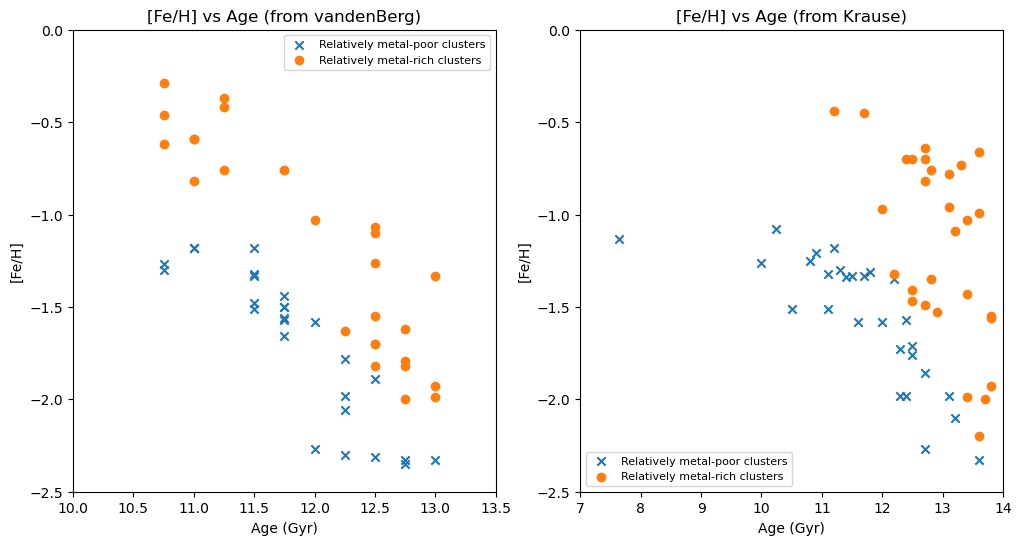

In [79]:
# Plotting Age vs Metallicty, and applying a distance mask to observe where the further away GCs are
dis_threshold = 10 # changing the distance threshold to 10 kpc, as the clusters > 45 kpc away do not show up in the Krause or vandenBerg databases

metalpoor_vb= vandenBerg_harris['FeH'] < -2/3*vandenBerg_harris['Age']+6.5 # Creating a mask for GCs further away from the galactic centre

fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter( # Plotting clusters that show up in the mask (greater than the distance threshold from Galactic Centre) 
    vandenBerg_harris['Age'][metalpoor_vb],
    vandenBerg_harris['FeH'][metalpoor_vb],
    marker='x',
    label = 'Relatively metal-poor clusters'
)
plt.xlabel('Age (Gyr)')
plt.ylabel('[Fe/H]')
plt.xlim(10,13.5)
plt.ylim(-2.5,0)
plt.scatter( # Plotting clusters that do not show up in the mask (less than the distance threshold from Galactic Centre) 
    vandenBerg_harris['Age'][~metalpoor_vb], 
    vandenBerg_harris['FeH'][~metalpoor_vb],
    marker='o',
    label = 'Relatively metal-rich clusters'
)
plt.title('[Fe/H] vs Age (from vandenBerg)')
plt.legend(loc = 'upper right',prop={'size': 8}) # Display legend

plt.subplot(1,2,2)

metalpoor_k = krause_harris['FeH'] < -2/3*krause_harris['Age']+6.8

plt.scatter( # Plotting clusters that show up in the mask (greater than the distance threshold from Galactic Centre) 
    krause_harris['Age'][metalpoor_k],
    krause_harris['FeH'][metalpoor_k],
    marker='x',
    label = 'Relatively metal-poor clusters'
)
plt.xlabel('Age (Gyr)')
plt.ylabel('[Fe/H]')
plt.xlim(7,14)
plt.ylim(-2.5,0)
plt.scatter( # Plotting clusters that do not show up in the mask (less than the distance threshold from Galactic Centre) 
    krause_harris['Age'][~metalpoor_k],
    krause_harris['FeH'][~metalpoor_k],
    marker='o',
    label = 'Relatively metal-rich clusters'
)
plt.title('[Fe/H] vs Age (from Krause)')
plt.legend(loc = 'lower left',prop={'size': 8}) # Display legend
plt.show()

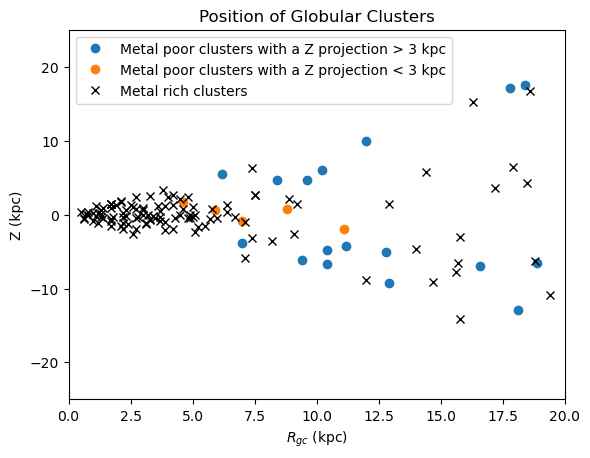

In [109]:
metal_poor_gcs = ['362',1261,1851,2808,3201,4590,4833,5024,5053,5272,5904,6101,6121,6205,6254,6341,6584,6715,6934,6981,7078,7089]

metalpoor_all = np.isin(harris['ID'].to_numpy(), metal_poor_gcs)
dist_mask = np.abs(harris['Z']) > 3

plt.plot(# Plotting clusters that show up in the metalpoor_all (greater than the distance threshold from Galactic Centre)
    harris['R_gc'][metalpoor_all][dist_mask],
    harris['Z'][metalpoor_all][dist_mask],
    'o', 
    label = 'Metal poor clusters with a Z projection > 3 kpc'  
)
plt.plot(# Plotting clusters that show up in the metalpoor_all (greater than the distance threshold from Galactic Centre)
    harris['R_gc'][metalpoor_all][~dist_mask],
    harris['Z'][metalpoor_all][~dist_mask],
    'o', 
    label = 'Metal poor clusters with a Z projection < 3 kpc'  
)
plt.plot(# Plotting clusters that show up in the metalpoor_all (greater than the distance threshold from Galactic Centre)
    harris['R_gc'][~metalpoor_all],
    harris['Z'][~metalpoor_all],
    'x', c = 'black',
    label = 'Metal rich clusters'
)
plt.xlabel(R'$R_{gc}$ (kpc)')
plt.ylabel('Z (kpc)')
plt.xlim(0,20)
plt.ylim(-25,25)
plt.title('Position of Globular Clusters')
plt.legend(loc = 'upper left')
plt.show()

In [110]:
# Printing the IDs of the GCs that are > 45kpc away from the Galactic centre
print('The following GCs are very likely to be accreted')
print(harris['ID'][metalpoor_all][dist_mask])

The following GCs are very likely to be accreted
2       362
4      1261
9      1851
24     4590
26     5024
27     5053
29     5272
39     5904
48     6101
54     6205
69     6341
121    6584
133    6715
148    6934
149    6981
151    7078
152    7089
Name: ID, dtype: object


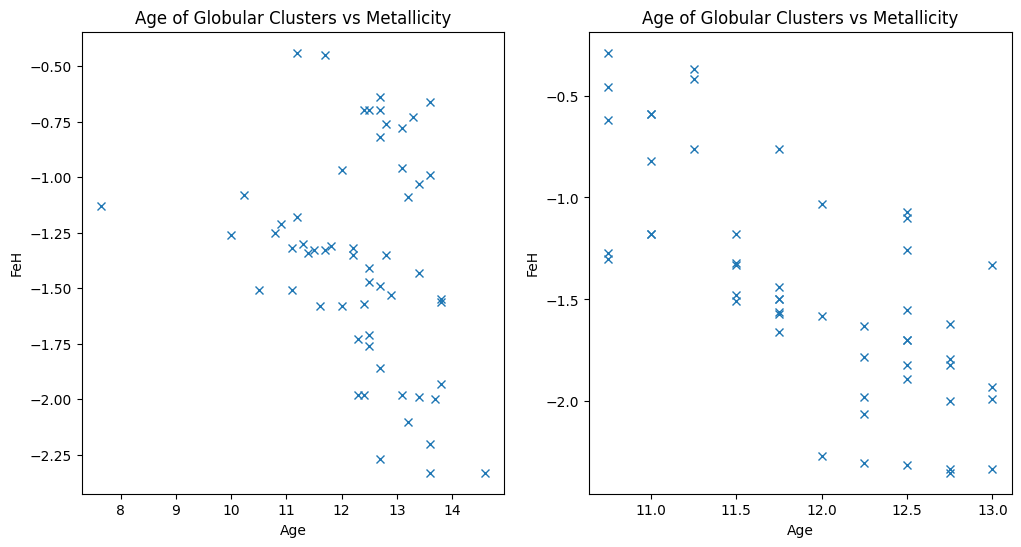

In [29]:
# Plotting the age of the globular clusters vs metallicity (from the Krause21 catalogue)
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(
    krause_harris['Age'],
    krause_harris['FeH'], 'x')

plt.xlabel('Age') #labelling x axis
plt.ylabel('FeH') #labelling y axis
plt.title('Age of Globular Clusters vs Metallicity') #adding title to plot

# Plotting the age of the globular clusters vs metallicity (from the VandenBergt2 catalogue)
plt.subplot(1,2,2)
plt.plot(
    vandenBerg_harris['Age'],
    vandenBerg_harris['FeH'], 'x')

plt.xlabel('Age')
plt.ylabel('FeH')
plt.title('Age of Globular Clusters vs Metallicity')


plt.show()

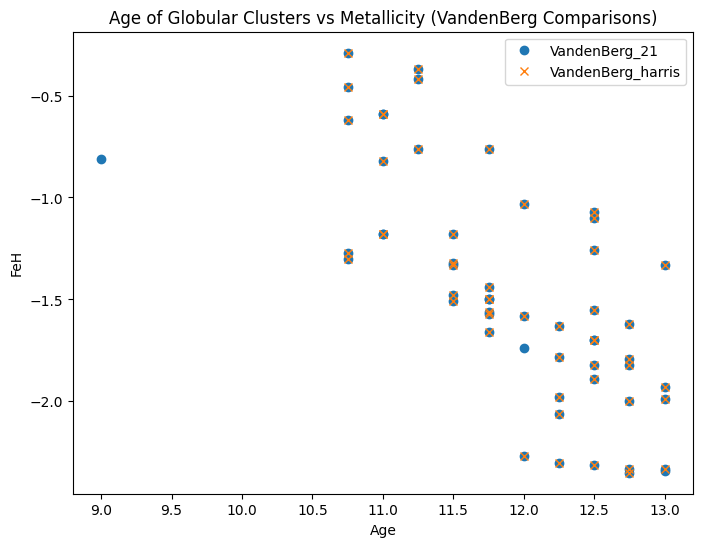

In [30]:
plt.figure(figsize=(8,6))

# Plot VandenBerg_21
plt.plot(
    vandenBerg_t2['Age'],
    vandenBerg_t2['FeH'],
    'o',
    label="VandenBerg_21"
)

# Plot VandenBerg_harris
plt.plot(
    vandenBerg_harris['Age'],
    vandenBerg_harris['FeH'],
    'x',
    label="VandenBerg_harris"
)

# Labels and title
plt.xlabel("Age")
plt.ylabel("FeH")
plt.title("Age of Globular Clusters vs Metallicity (VandenBerg Comparisons)")
plt.legend()
plt.show()

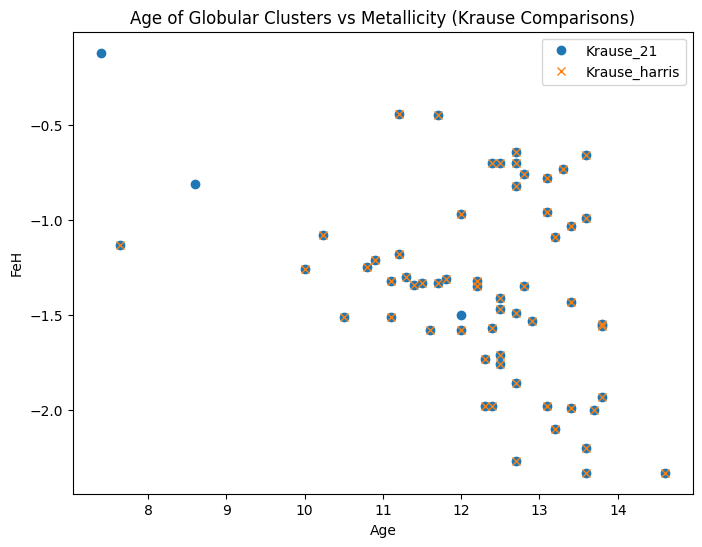

In [31]:
plt.figure(figsize=(8,6))

# Plot Krause_21
plt.plot(
    krause_21['Age'],
    krause_21['FeH'],
    'o',
    label="Krause_21"
)

# Plot Krause_harris
plt.plot(
    krause_harris['Age'],
    krause_harris['FeH'],
    'x',
    label="Krause_harris"
)

# Labels and title
plt.xlabel("Age")
plt.ylabel("FeH")
plt.title("Age of Globular Clusters vs Metallicity (Krause Comparisons)")
plt.legend()

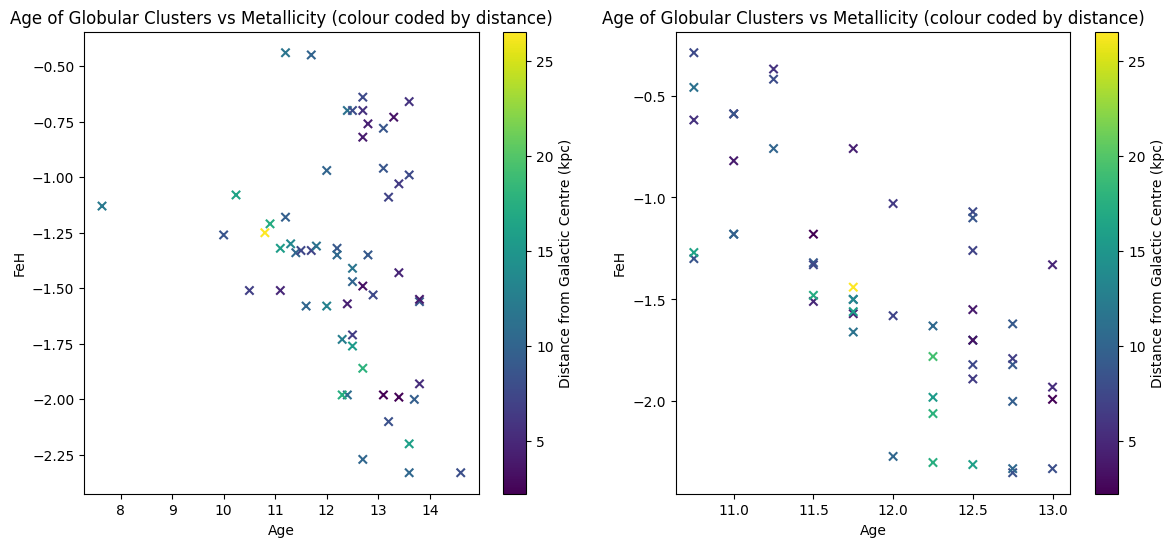

In [32]:
# Computing distance from the Galactic Centre
harris['dist_gc'] = np.sqrt(np.square(harris['X'])+np.square(harris['Y'])+np.square(harris['Z']))

krause_harris = pd.merge(krause_21, harris[['ID','dist_gc']], on='ID') 
vandenBerg_harris = pd.merge(vandenBerg_t2, harris[['ID','dist_gc']], on='ID')

# Color coding the plot of 'age vs metallicity' (from the Krause21 catalogue) based on distance from Galactic Centre
fig = plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sc1 =plt.scatter(
    krause_harris['Age'],
    krause_harris['FeH'],
    c=krause_harris['dist_gc'], # colour by distance 
    cmap='viridis', 
    marker='x')

plt.xlabel('Age') #labelling x axis
plt.ylabel('FeH') #labelling y axis
plt.title('Age of Globular Clusters vs Metallicity (colour coded by distance)') #adding title to plot
cbar1 = plt.colorbar(sc1) 
cbar1.set_label('Distance from Galactic Centre (kpc)')

# Color coding the plot of 'age vs metallicity' (from the VandenBergt2 catalogue) based on distance from Galactic Centre
plt.subplot(1,2,2)
sc2 = plt.scatter(
    vandenBerg_harris['Age'],
    vandenBerg_harris['FeH'], 
    c=vandenBerg_harris['dist_gc'], 
    cmap='viridis', 
    marker='x')

plt.xlabel('Age')
plt.ylabel('FeH')
plt.title('Age of Globular Clusters vs Metallicity (colour coded by distance)')
cbar2 = plt.colorbar(sc2) 
cbar2.set_label('Distance from Galactic Centre (kpc)')


plt.show()



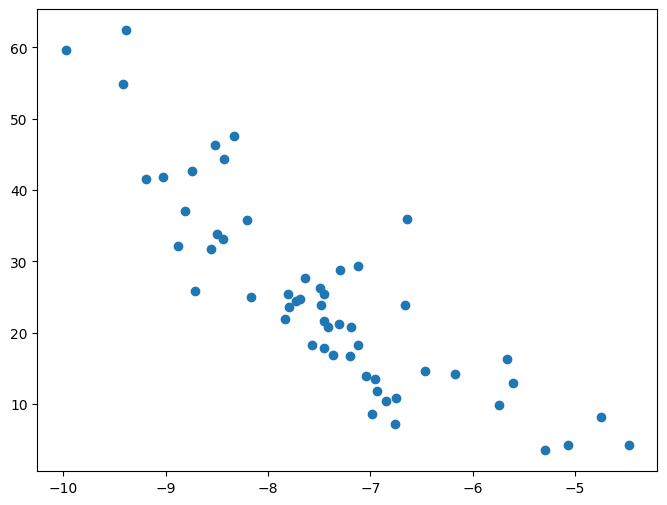

In [33]:
# Plotting Velocity Dispersion vs Mass
plt.figure(figsize=(8,6))

# Plot VandenBerg_21
plt.plot(
    vandenBerg_t2['M_V'],
    vandenBerg_t2['v_e0'],
    'o',
    label="VandenBerg_21"
)


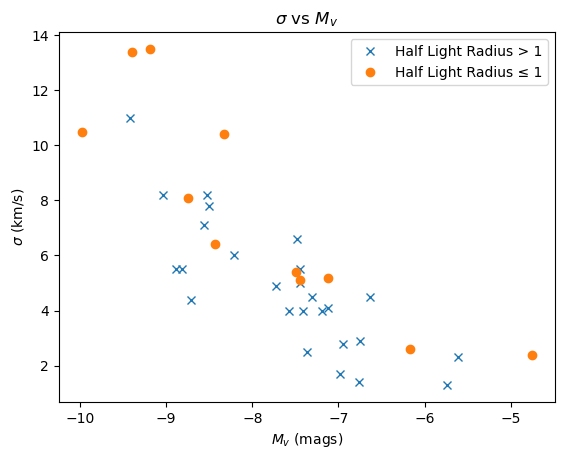

In [92]:
r_h_threshold = 1
mask = vandenBerg_harris['r_h'] > r_h_threshold
plt.plot(
    vandenBerg_harris['M_V'][mask],
    vandenBerg_harris['sig_v'][mask],
    'x', 
    label = 'Half Light Radius > '+ str(r_h_threshold) 
)
plt.plot(
    vandenBerg_harris['M_V'][~mask],
    vandenBerg_harris['sig_v'][~mask],
    'o', 
    label = 'Half Light Radius ≤ '+ str(r_h_threshold)
)

plt.title(r'$\sigma$ vs $M_v$')
plt.xlabel('$M_v$ (mags)')
plt.ylabel('$\sigma$ (km/s)')
plt.legend()

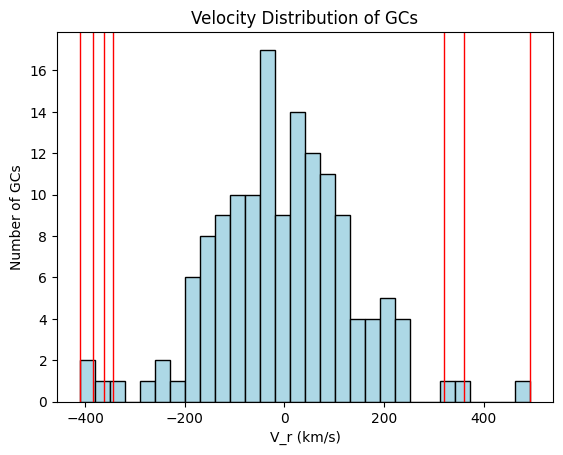

The following GCs are very likely to be accreted
          ID    v_r
9       1851  320.5
18      3201  494.0
48      6101  361.4
92   Djorg 1 -362.4
148     6934 -411.4
149     6981 -345.0
150     7006 -384.1


In [40]:
v_r = harris['v_r']

lower_bound = -300
upper_bound = 300

outliers = (v_r < lower_bound) | (v_r > upper_bound)

# Plot histogram
plt.hist(v_r, bins=30, color='lightblue', edgecolor='black')
plt.xlabel('V_r (km/s)')
plt.ylabel('Number of GCs')
plt.title('Velocity Distribution of GCs')

for val in v_r[outliers]:
    plt.axvline(val, color='red', linestyle='-', linewidth=1)

plt.show()

print('The following GCs are very likely to be accreted')
print(harris.loc[outliers, ['ID', 'v_r']])